# A. Import Libraries

In [32]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as md
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20,5)
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

# B. Import Datasets

In [33]:
data_15 = pd.read_csv("C:\\Users\\quans\\Documents\\Springboard Data Analysis\\Capstone 2\\2015.csv", index_col=False)
data_16 = pd.read_csv("C:\\Users\\quans\\Documents\\Springboard Data Analysis\\Capstone 2\\2016.csv", index_col=False)
data_17 = pd.read_csv("C:\\Users\\quans\\Documents\\Springboard Data Analysis\\Capstone 2\\2017.csv", index_col=False)
data_18 = pd.read_csv("C:\\Users\\quans\\Documents\\Springboard Data Analysis\\Capstone 2\\2018.csv", index_col=False)
data_19 = pd.read_csv("C:\\Users\\quans\\Documents\\Springboard Data Analysis\\Capstone 2\\2019.csv", index_col=False)

# C. Data Cleansing

## Adjusting columns

In [34]:
# Taking specific columns for 2015 to 2017

data_15 = data_15[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]
data_16 = data_16[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Trust (Government Corruption)']]
data_17 = data_17[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.']]

In [35]:
# Reordering columns for 2018 and 2019

data_18 = data_18[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
data_19 = data_19[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]

In [36]:
# Renaming columns so they all match

column_titles = ['Country or Region', 'Rank', 'Happiness Score', 'Economy', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Perception of Corruption']

data_15.columns = column_titles
data_16.columns = column_titles
data_17.columns = column_titles
data_18.columns = column_titles
data_19.columns = column_titles

## Combine Dataframes

In [37]:
# Adding Year column for each dataframe

data_15['Year'] = 2015
data_16['Year'] = 2016
data_17['Year'] = 2017
data_18['Year'] = 2018
data_19['Year'] = 2019

In [38]:
# Making one dataframe  to include all the years

data = pd.concat([data_15, data_16, data_17, data_18, data_19]).reset_index(drop=True)

## Missing Values

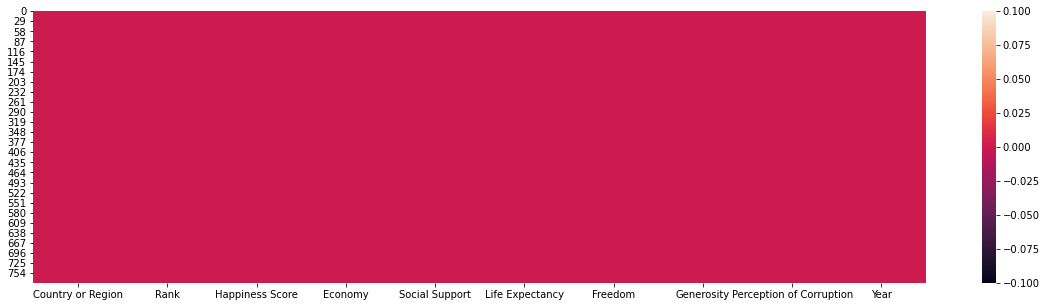

In [41]:
# Double checking for missing values

sns.heatmap(data = data.isna())

# D. Analysis

## Summary

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country or Region         782 non-null    object 
 1   Rank                      782 non-null    int64  
 2   Happiness Score           782 non-null    float64
 3   Economy                   782 non-null    float64
 4   Social Support            782 non-null    float64
 5   Life Expectancy           782 non-null    float64
 6   Freedom                   782 non-null    float64
 7   Generosity                782 non-null    float64
 8   Perception of Corruption  782 non-null    float64
 9   Year                      782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 67.2+ KB


In [43]:
# For all five years 

data.describe()

,Rank,Happiness Score,Economy,Social Support,Life Expectancy,Freedom,Generosity,Perception of Corruption,Year
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,78.698210,5.379018,0.916047,1.078392,0.612416,0.411091,0.218576,0.125275,2016.993606
std,45.182384,1.127456,0.407340,0.329548,0.248309,0.152880,0.122321,0.105844,1.417364
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.509750,0.606500,0.869363,0.440183,0.309768,0.130000,0.054000,2016.000000
50%,79.000000,5.322000,0.982205,1.124735,0.647310,0.431000,0.201982,0.090905,2017.000000
75%,118.000000,6.189500,1.236187,1.327250,0.808000,0.531000,0.278832,0.155861,2018.000000
max,158.000000,7.769000,2.096000,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


## Mean

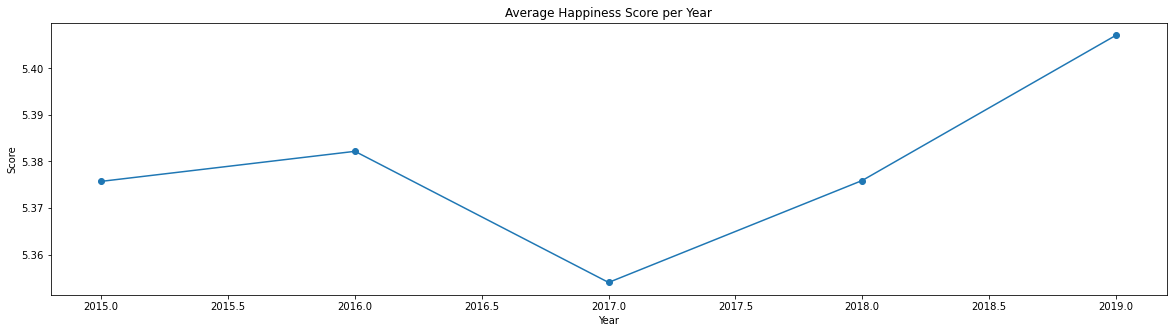

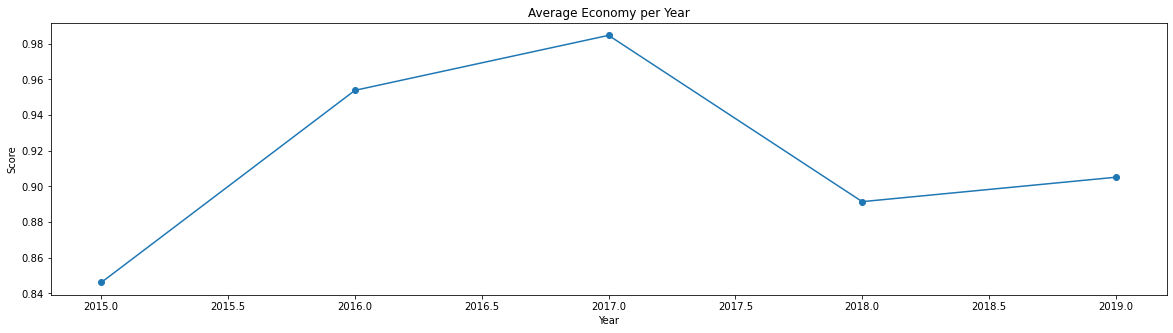

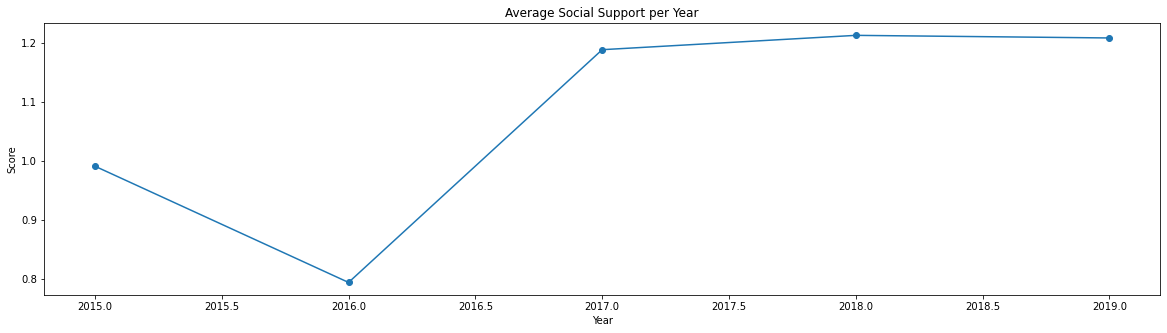

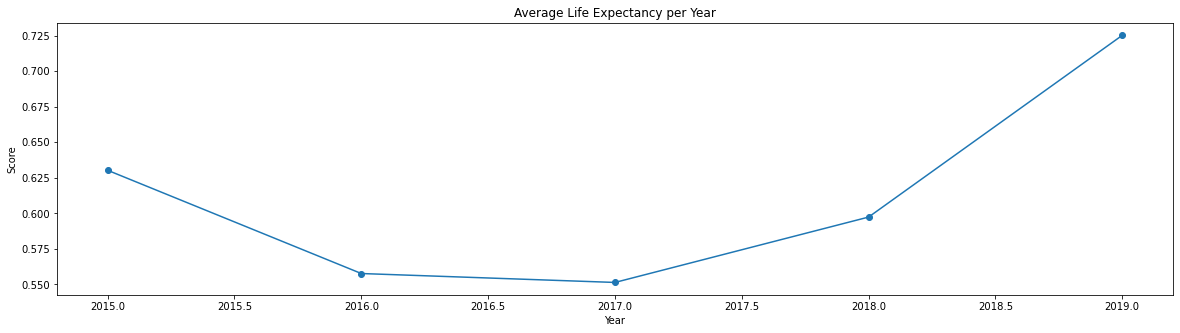

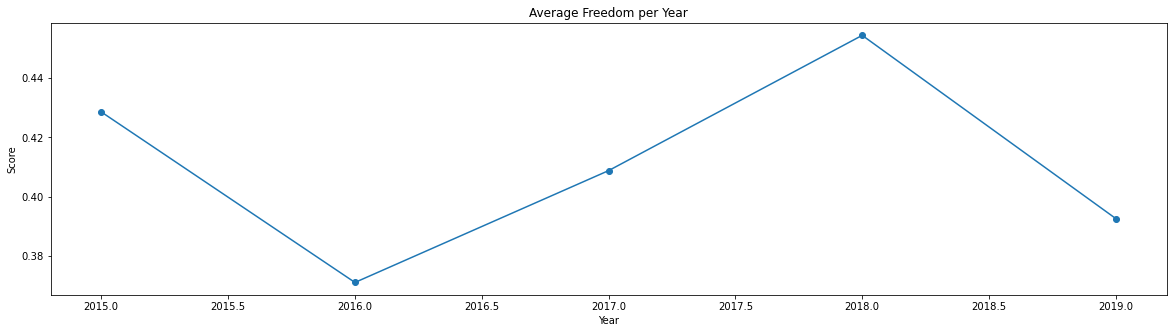

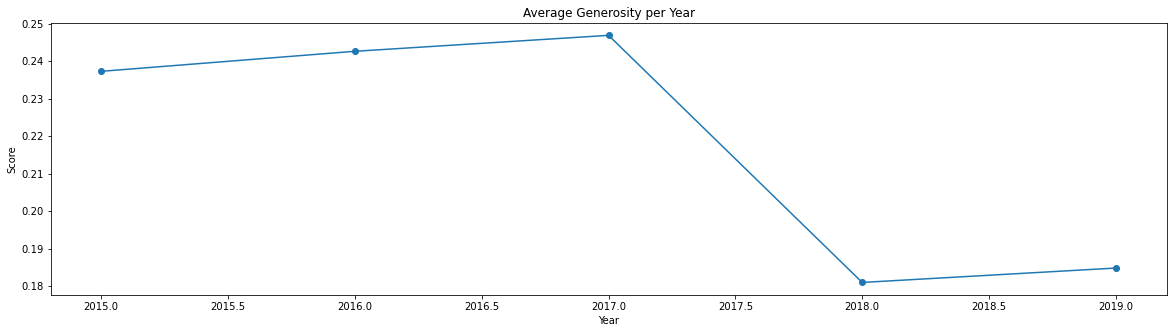

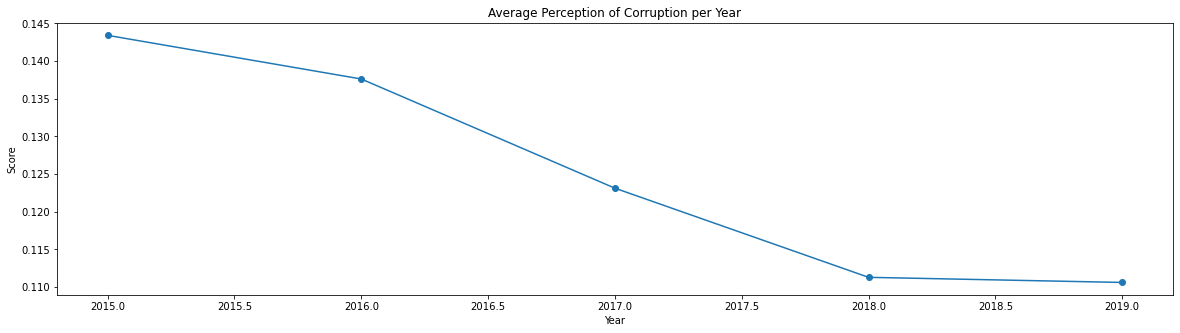

In [44]:
# Grouped by year 

for column in data:
     if column != 'Country or Region' and column != 'Rank' and column != 'Year':
        variable = data.groupby(by='Year')[column].mean() 
        fig = plt.subplots()
        plt.plot(variable, marker='o')
        plt.xlabel('Year')
        plt.ylabel('Score')
        plt.title(f'Average {column} per Year')

For the most part, all variables are following a trend across all five years. In approximately one out of the five points for each variable, there is one that does not follow the trend. 
- Happiness scores increase but dips in 2017.
- Economy increases but dips in 2018.
- Social support increases but dips in 2016.
- Life expectancy dips in 2016 and 2017 but increases in following years. 
- Freedom increases but dips in 2016 and 2019.
- Generosity increases but dips in 2018. 

## Correlation

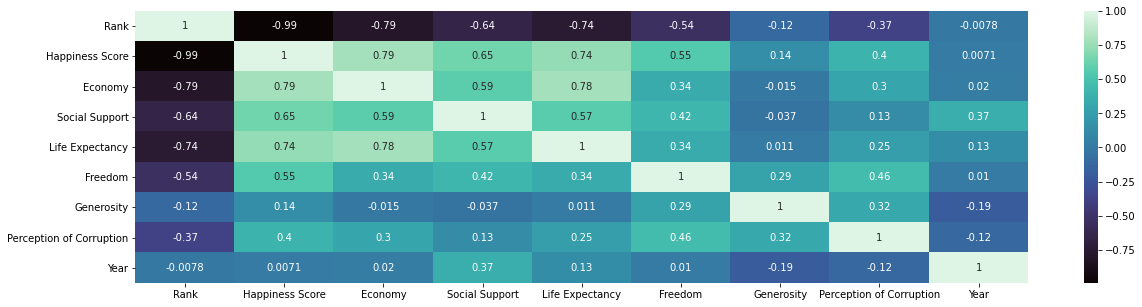

In [45]:
# Creating a heatmap of correlations

corr_data = data.corr()

sns.heatmap(corr_data, annot=True, cmap="mako")

                          Happiness Score
Economy                          0.789284
Life Expectancy                  0.742456
Social Support                   0.648799
Freedom                          0.551258
Perception of Corruption         0.395792
Generosity                       0.137578


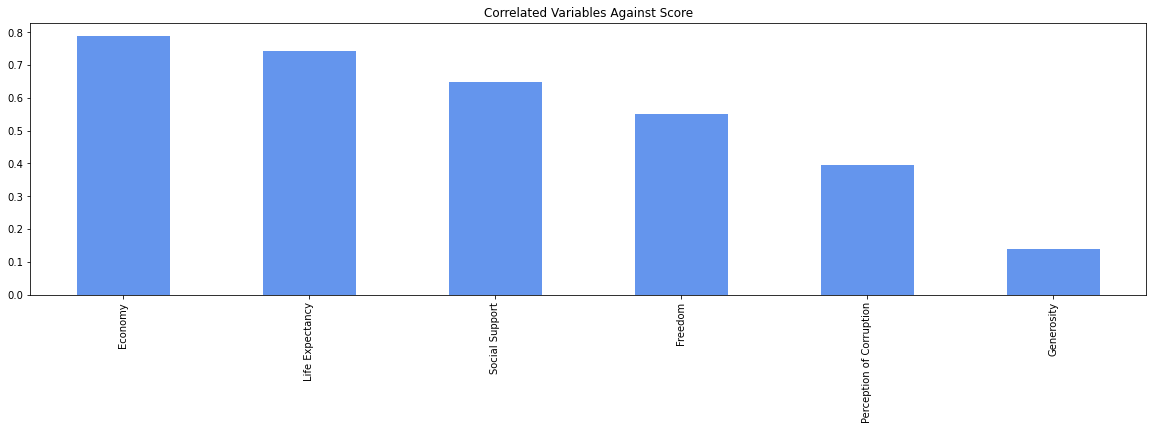

In [46]:
# Finding variables with the highest correlation to score

score_corr_col = corr_data[['Happiness Score']].sort_values('Happiness Score', ascending=False)
score_corr = score_corr_col.loc[['Economy', 'Life Expectancy', 'Social Support', 'Freedom', 'Perception of Corruption', 'Generosity']]

# Barplot of correlated variables against score 

score_corr.plot(kind='bar', legend=None, color='cornflowerblue')
plt.title('Correlated Variables Against Score')

print(score_corr)

- Economy and life expectancy show the strongest postive correlations to happiness score with coefficients over 0.700 while generosity shows the weakest positive correlation with a coefficient of 0.138.

Text(0.5, 1.0, 'Happiness Score vs Generosity')

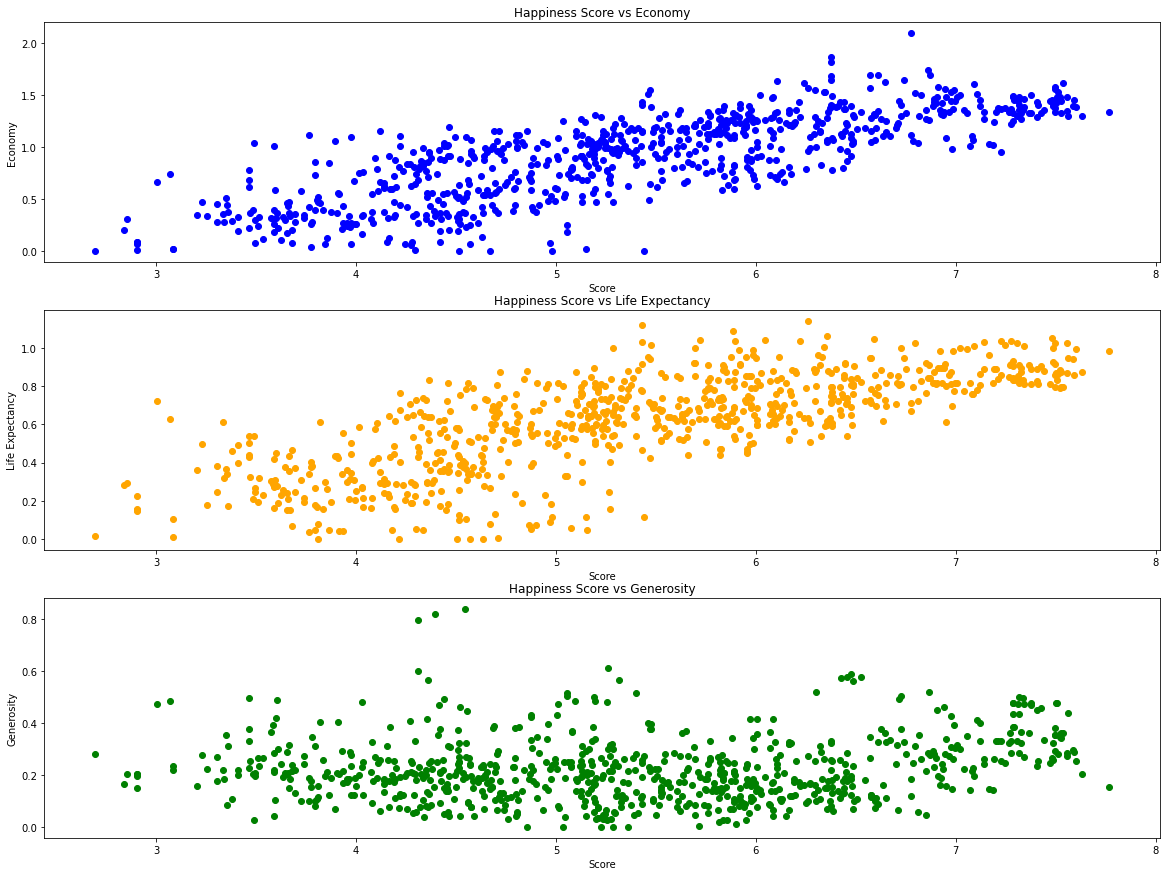

In [47]:
plt.figure(figsize=(20, 15))

plt.subplot(3, 1, 1)
plt.scatter(data['Happiness Score'], data['Economy'], color='blue')
plt.xlabel('Score')
plt.ylabel('Economy')
plt.title('Happiness Score vs Economy')

plt.subplot(3, 1, 2)
plt.scatter(data['Happiness Score'], data['Life Expectancy'], color='orange')
plt.xlabel('Score')
plt.ylabel('Life Expectancy')
plt.title('Happiness Score vs Life Expectancy')

plt.subplot(3, 1, 3)
plt.scatter(data['Happiness Score'], data['Generosity'], color='green')
plt.xlabel('Score')
plt.ylabel('Generosity')
plt.title('Happiness Score vs Generosity')

- In a visual display, we can clearly see the trend line for economy and life expectancy are increasing as happiness scores increase. 
- It is more difficult to see a positive correlation for generosity and happiness scores. Most of the points are along a horizontal line. 

## Top and Bottom Ten in 2019

Text(0.5, 1.0, 'Top Ten Happiest Countries in 2019')

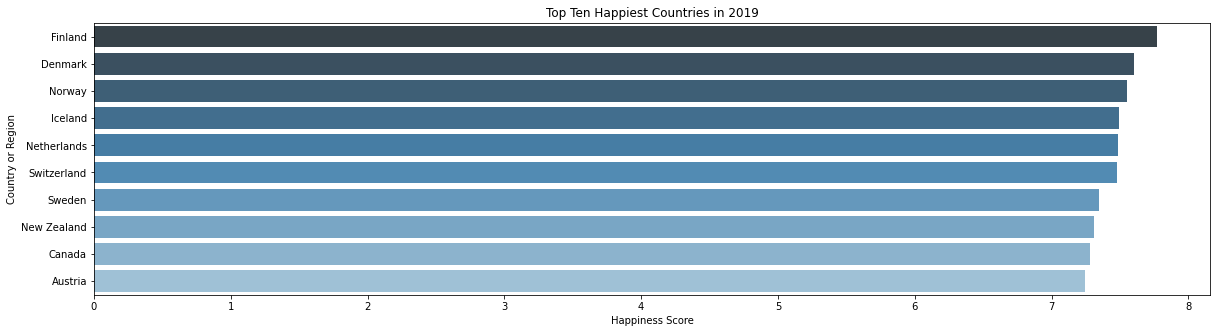

In [48]:
# Top 10 Happiest Countries in 2019

top_ten_19 = data[data['Year']==2019].groupby(by = ['Country or Region'])['Happiness Score'].mean().reset_index()
top_ten_19 = top_ten_19.sort_values('Happiness Score', ascending=False).head(10)

sns.barplot(x='Happiness Score', y='Country or Region', data=top_ten_19, palette="Blues_d")
plt.title('Top Ten Happiest Countries in 2019')

- The happiest countries in the world are traditional, developed, Western countries. Eight out of ten are located in Europe.

Text(0.5, 1.0, 'Ten Least Happiest Countries in 2019')

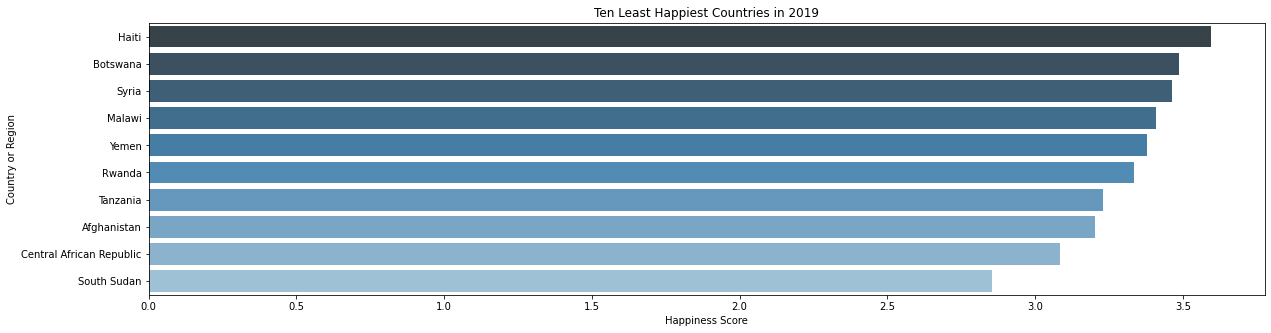

In [53]:
# 10 Least Happiest Countries in 2019

bottom_ten_19 = data[data['Year']==2019].groupby(by = ['Country or Region'])['Happiness Score'].mean().reset_index()
bottom_ten_19 = bottom_ten_19.sort_values('Happiness Score').head(10)
bottom_ten_19 = bottom_ten_19.sort_values('Happiness Score', ascending=False)

sns.barplot(x='Happiness Score', y='Country or Region', data=bottom_ten_19, palette="Blues_d")
plt.title('Ten Least Happiest Countries in 2019')

- The least happiest countries are countries that are less developed, war zones, or have sufferred natural disasters. 

## Regression

In [54]:
# Ordinary Least Square Regression Model Using 2019 Dataset

X = data_19[['Economy', 'Social Support', 'Life Expectancy', 'Freedom', 'Generosity', 'Perception of Corruption']]
Y = data_19[['Happiness Score']]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
model_results = model.fit()
print(model_results.summary())

                            OLS Regression Results                            
Dep. Variable:        Happiness Score   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     87.62
Date:                Thu, 07 Jan 2021   Prob (F-statistic):           2.40e-46
Time:                        13:58:31   Log-Likelihood:                -119.76
No. Observations:                 156   AIC:                             253.5
Df Residuals:                     149   BIC:                             274.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

- The r squared and adjusted r squared are 0.770+ which indicate this model is a good fit. Approximately 77% of the data can be predicted using this model. 

In [55]:
# Predict happiness scores for countries in 2019

model_predictions = model_results.predict(X).to_frame()
model_predictions.columns = ['Predicted Happiness Score']

data_19_with_predictions = data_19.join(model_predictions).sort_values('Predicted Happiness Score', ascending=False)

data_19_with_predictions.head(10)

,Country or Region,Rank,Happiness Score,Economy,Social Support,Life Expectancy,Freedom,Generosity,Perception of Corruption,Year,Predicted Happiness Score
33,Singapore,34,6.262,1.572,1.463,1.141,0.556,0.271,0.453,2019,7.271019
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019,7.177318
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019,7.093064
5,Switzerland,6,7.480,1.452,1.526,1.052,0.572,0.263,0.343,2019,7.065252
7,New Zealand,8,7.307,1.303,1.557,1.026,0.585,0.330,0.380,2019,7.044242
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019,7.005482
15,Ireland,16,7.021,1.499,1.553,0.999,0.516,0.298,0.310,2019,6.978492
10,Australia,11,7.228,1.372,1.548,1.036,0.557,0.332,0.290,2019,6.971146
13,Luxembourg,14,7.090,1.609,1.479,1.012,0.526,0.194,0.316,2019,6.964053
6,Sweden,7,7.343,1.387,1.487,1.009,0.574,0.267,0.373,2019,6.958686


- Score predictions were approximately 60% correct in the ranked top ten alone. There are four countries with high predicted happiness scores which are not in the actual top ten ranks. 

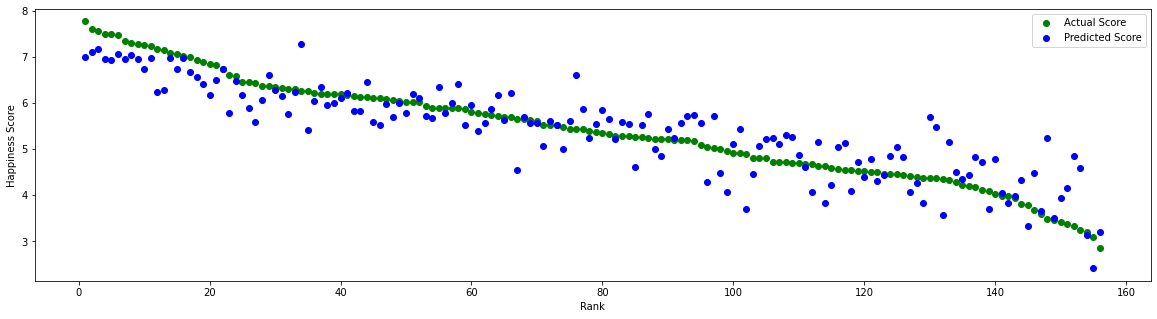

In [56]:
fig, ax = plt.subplots()

plt.scatter(data_19_with_predictions['Rank'], data_19_with_predictions['Happiness Score'], label='Actual Score', color='green')
plt.xlabel('Rank')
plt.ylabel('Happiness Score')

plt.scatter(data_19_with_predictions['Rank'], data_19_with_predictions['Predicted Happiness Score'], label='Predicted Score', color='blue')
plt.xlabel('Rank')
plt.ylabel('Happiness Score')

ax.legend()

- While the actual scores are in a straight line, the predicted scores are roughly scatterred around the actual country scores. 

In [ ]:
# Validate predictions
plt.figure(figsize=(10,5))
sns.scatterplot(x=residuals2.index, y=residuals2.Residuals, alpha=.5, x_jitter=0.2, y_jitter=0.2)
plt.xlabel('Index', fontsize=16)
plt.ylabel('Original - Predicted Price ', fontsize=16)
plt.title('Price Difference Plot Using Car Status', fontsize=20)
plt.savefig('Price Difference Plot Using Car Status.png', bbox_inches='tight', dpi=300)
plt.show()